# Introduction to Statistics
### Author: Vedant Basu

In [1]:
import numpy as np
import math
import os.path
from os import path
import tables
import pylab
import matplotlib.pyplot as plt
plt.rc('font', family = 'sans-serif', size = 16)
plt.rc('legend', fontsize = 16)
plt.rc('axes', labelsize = 24)
plt.rc('axes', titlesize = 24)
plt.rc('axes', linewidth = 1.5)
plt.rc('xtick', direction = 'in', labelsize = 16)
plt.rc('ytick', direction = 'in', labelsize = 16)

#jupyter notebook magic
%matplotlib inline


Let's generate some random data to histogram using numpy.random.uniform. This will draw random data points from a uniform distribution (a distribution where all points within a given range are equally likely to be picked)

# Histograms and Binning
We use the basic histogram plotted by matplotlib.pyplot.hist.\
Most python histogramming tools can take a number or an array of bin edges for the bins argument. If given a number, the histogram will bin the data points into that number of bins or even width from the minimum value in the array to the maximum value in the array. If given an array of bin edges, the histogram object will bin the data points into the bins defined by the edges.

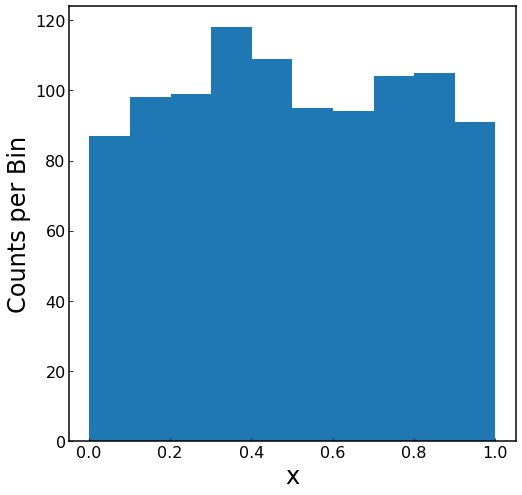

In [3]:
#get 1000 random data points from a uniform (flat) distribution from 0 to 1
x = np.random.uniform(low = 0.0, high = 1.0, size = 1000)
# print(x)
#make a plot of these random variables
fig = plt.gcf() #grab current figure
fig.set_size_inches(8,8) #change size of figure to make larger
""
#plot a histogram from the data in the numpy array x
plt.hist(x)

#add labels to figure
plt.xlabel('x')
plt.ylabel('Counts per Bin')
plt.show()

An important parameter in histogramming is binning. If the bins are too narrow, then each bin will contain fewer points, and the bins will be subject to statistical fluctuations. 
If the bins are too wide, then you might smear out some interesting features.

Most python histogramming tools can take a number or an array of bin edges for the bins argument.
If given a number, the histogram will bin the data points into that number of bins or even width from the minimum value in the array to the maximum value in the array. If given an array of bin edges, the histogram object will bin the data points into the bins defined by the edges.

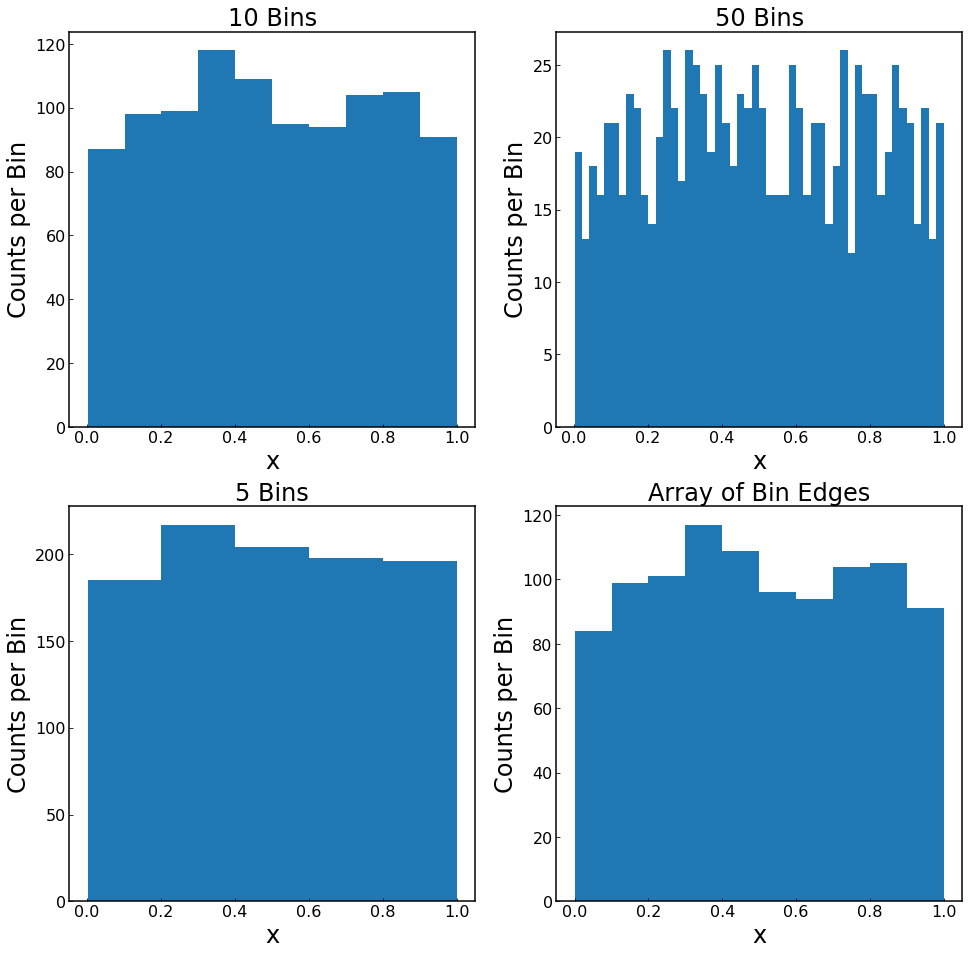

In [4]:
#Binning
#make a plot of these random variables
fig, axes = plt.subplots(nrows = 2 , ncols = 2) #grab figure and axes to make a subplot
fig.set_size_inches(16,16) #change size of figure to make larger


#plot a histogram from the data in the numpy array x and use 10 bins
axes[0][0].hist(x, bins= 10)

#add labels to figure
axes[0][0].set_xlabel('x')
axes[0][0].set_ylabel('Counts per Bin')
axes[0][0].set_title('10 Bins')

#plot a histogram from the data in the numpy array x and use 50 bins
axes[0][1].hist(x, bins= 50)

#add labels to figure
axes[0][1].set_xlabel('x')
axes[0][1].set_ylabel('Counts per Bin')
axes[0][1].set_title('50 Bins')

#plot a histogram from the data in the numpy array x and use 5 bins
axes[1][0].hist(x, bins= 5)

#add labels to figure
axes[1][0].set_xlabel('x')
axes[1][0].set_ylabel('Counts per Bin')
axes[1][0].set_title('5 Bins')

#plot a histogram from the data in the numpy array x and using set bin edges
bin_edges = np.linspace(0, 1., 10 + 1) #make array of 11 bin edges from 0 to 1 
axes[1][1].hist(x, bins= bin_edges)

#add labels to figure
axes[1][1].set_xlabel('x')
axes[1][1].set_ylabel('Counts per Bin')
axes[1][1].set_title('Array of Bin Edges')

plt.show()

# Probability

In [5]:
print ('True probability of rolling 1 for a fair dice: 1/6='+str(np.around(1/6,decimals=4)))

sizes = [10, 100, 1000, 10000, 100000, 1000000]
for size in sizes:
    x = np.random.randint(1,7,size) #Randomly draw values of 1 through 6
    p_1 = len(np.where(x == 1)[0])/float(size) #Calculated the frequentist probability estimate
    print ('Calculated probability of rolling 1 for '+str(size)+' trials:'+str(p_1))

True probability of rolling 1 for a fair dice: 1/6=0.1667
Calculated probability of rolling 1 for 10 trials:0.2
Calculated probability of rolling 1 for 100 trials:0.19
Calculated probability of rolling 1 for 1000 trials:0.184
Calculated probability of rolling 1 for 10000 trials:0.1681
Calculated probability of rolling 1 for 100000 trials:0.1688
Calculated probability of rolling 1 for 1000000 trials:0.166934


# Central Limit Theorem
When a large number of samples ($X_1,X_2 .. X_n$) are drawn from any distribution with a given mean $\mu$ and standard deviation $\sigma$, then the mean $\bar{X}$ is approximately normal, with mean value $\mu_{\bar{X}}=\mu$ and $\sigma_{\bar{X}}^2=\frac{\sigma^2}{n}$. \
The sum of the sample values ($\sum_{i=1}^{n}$) is also approximately normal, with mean value $\mu_{\sum_{}^{}X}=n\mu$ and $\sigma_{\sum_{}^{}X}^2=n\sigma^2$. 

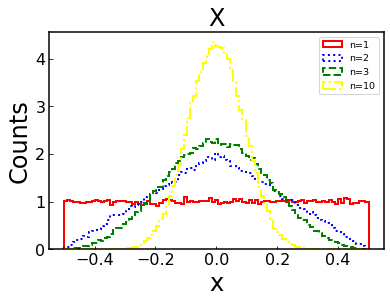

In [7]:
# seed random number generator
n_samples=100000
n_bins=100
bins=np.linspace(-0.5,0.5,n_bins)
normalizer=float(n_bins/n_samples)

np.random.seed(None)
x_vals_1=np.sum(np.random.uniform(low=-0.5, high=0.5, size=(1,n_samples)),axis=0)/1
x_vals_2=np.sum(np.random.uniform(low=-0.5, high=0.5, size=(2,n_samples)),axis=0)/2
x_vals_3=np.sum(np.random.uniform(low=-0.5, high=0.5, size=(3,n_samples)),axis=0)/3
x_vals_10=np.sum(np.random.uniform(low=-0.5, high=0.5, size=(10,n_samples)),axis=0)/10

linestyles=['solid','dotted','dashed','dashdot']
plt.hist(x_vals_1,bins=bins,histtype='step',density=True,stacked=False,fill=False,linewidth=2,linestyle=linestyles[0],label="n=1", color='red')
plt.hist(x_vals_2,bins=bins,histtype='step',density=True,stacked=False,fill=False,linewidth=2,linestyle=linestyles[1],label="n=2", color='blue')
plt.hist(x_vals_3,bins=bins,histtype='step',density=True,stacked=False,fill=False,linewidth=2,linestyle=linestyles[2],label="n=3", color='green')
plt.hist(x_vals_10,bins=bins,histtype='step',density=True,stacked=False,fill=False,linewidth=2,linestyle=linestyles[3],label="n=10", color='yellow')

plt.xlabel('x')
plt.ylabel('Counts')
# plt.yscale('log')
plt.title(r'X')#+'\n'+r' (Livetime:'+str(np.around(Livetime_NuE_atmos/86400,decimals=2))+' days)')
# plt.legend(bbox_to_anchor=(1.0, 1.),prop={'size': 12})
plt.legend(loc=1,prop={'size': 9.5})
plt.show();


# Monte Carlo for 1D Random Walk
We write a simple particle Monte Carlo code, to simulate diffusion (random walk) in one dimension. Consider N= $10^6$ particles released from the origin (x=0) at time t=0. During  each  time  step, each  particle moves either left or right, randomly with equal probability, by one step. The particles do not interact with one another. The space and time step sizes are each 1 and dimensionless. Write a Monte Carlo code to determine the spatial(x) distribution of the N particles after n time steps.

In [ ]:
import scipy.stats as stats
import scipy as sp

# seed random number generator
p_number=1000000
np.random.seed(None)
n=100
bins=np.linspace(-n,n,100)


def rand_bin(n=n,p_number=p_number):
    value=np.random.binomial(n, 0.5, size=p_number)
    x_vals=2*value-n
    return x_vals
# import timeit
# print('randsteps:'+str(timeit.timeit("rand_steps()", 'from __main__ import rand_steps',number=1000)))
# print('randbin:'+str(timeit.timeit("rand_bin()", 'from __main__ import rand_bin',number=1000)))
x_vals_10=rand_bin(10,p_number)
x_vals_30=rand_bin(30,p_number)
x_vals_100=rand_bin(100,p_number)
x_10_binned,x_bin_edges=np.histogram(x_vals_10)
x_10_std=np.std(x_vals_10)
# print('x_10:'+str(np.sum(x_10_binned)))
x_30_binned,x_bin_edges=np.histogram(x_vals_30)
x_30_std=np.std(x_vals_30)
# print('x_30:'+str(np.sum(x_30_binned)))
x_100_binned,x_bin_edges=np.histogram(x_vals_100)
x_100_std=np.std(x_vals_100)
# print('x_100:'+str(np.sum(x_100_binned)))

linestyles=['solid','dotted','dashed','dashdot']
plt.hist(x_vals_10,bins=bins,histtype='step',stacked=False,fill=False,linewidth=2,linestyle=linestyles[0],label="n=10,std="+str(x_10_std), color='red')
plt.hist(x_vals_30,bins=bins,histtype='step',stacked=False,fill=False,linewidth=2,linestyle=linestyles[1],label="n=30,std="+str(x_30_std), color='blue')
plt.hist(x_vals_100,bins=bins,histtype='step',stacked=False,fill=False,linewidth=2,linestyle=linestyles[2],label="n=100,std="+str(x_100_std), color='yellow')

plt.xlabel('x')

plt.xlim(np.amin(x_vals_100), np.amax(x_vals_100))
plt.ylabel('Particle Number')
plt.title(r'Random Walk')#+'\n'+r' (Livetime:'+str(np.around(Livetime_NuE_atmos/86400,decimals=2))+' days)')
# plt.legend(bbox_to_anchor=(1.0, 1.),prop={'size': 12})
plt.legend(loc=1,prop={'size': 9.5})
plt.show();
